In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from plotting import Plotting
from loading_preparing_data import PrepData
from matplotlib.colors import ListedColormap
from statannotations.Annotator import Annotator

In [2]:
# Set filepath
filepath = '../../'
# Create an instance of the PrepData class
prepdata = PrepData('panda', filepath, ['gad', 'phq', 'bdi'])
# Create an instance of the Plotting class
pp = Plotting('panda')
# Load raw data
D = prepdata.load_data()
# Prep action choices to plot
data = prepdata.extract_data(D)
Nsj = len(data['subids'])
# Save figures
save_figure = False

In [3]:
# Plotting options
sns.set(style="white")
plt.rcParams.update({'font.size': 18})
opt_plot = {"xlabel": 'trials',
            "ylabel": 'probability to go',
            "title": ['go to win', 'go to avoid', 'nogo to win', 'nogo to avoid'],
            "format": False,
            "colormap": ListedColormap(['lightgrey', 'w'], N=2)}
figpath = '../../results/paper_figures/'

Paper Figure 1
---

/var/folders/5z/t44r3krd25sftrcjrj8j__4m0000gn/T/ipykernel_54417/2516987267.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2,1,1)
/var/folders/5z/t44r3krd25sftrcjrj8j__4m0000gn/T/ipykernel_54417/2516987267.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels([f'{y:.1f}' if y <= 1 else '' for y in y_ticks]);
/var/folders/5z/t44r3krd25sftrcjrj8j__4m0000gn/T/ipykernel_54417/2516987267.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels([f'{y:.1f}' if y <= 1 else '' for y in y_ticks]);
/var/folders/5z/t44r3krd25sftrcjrj8j__4m0000gn/T/ipykernel_54417/2516987267.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels([f'{y:.1f}' if y <= 1 else '' for y in y_ticks]);


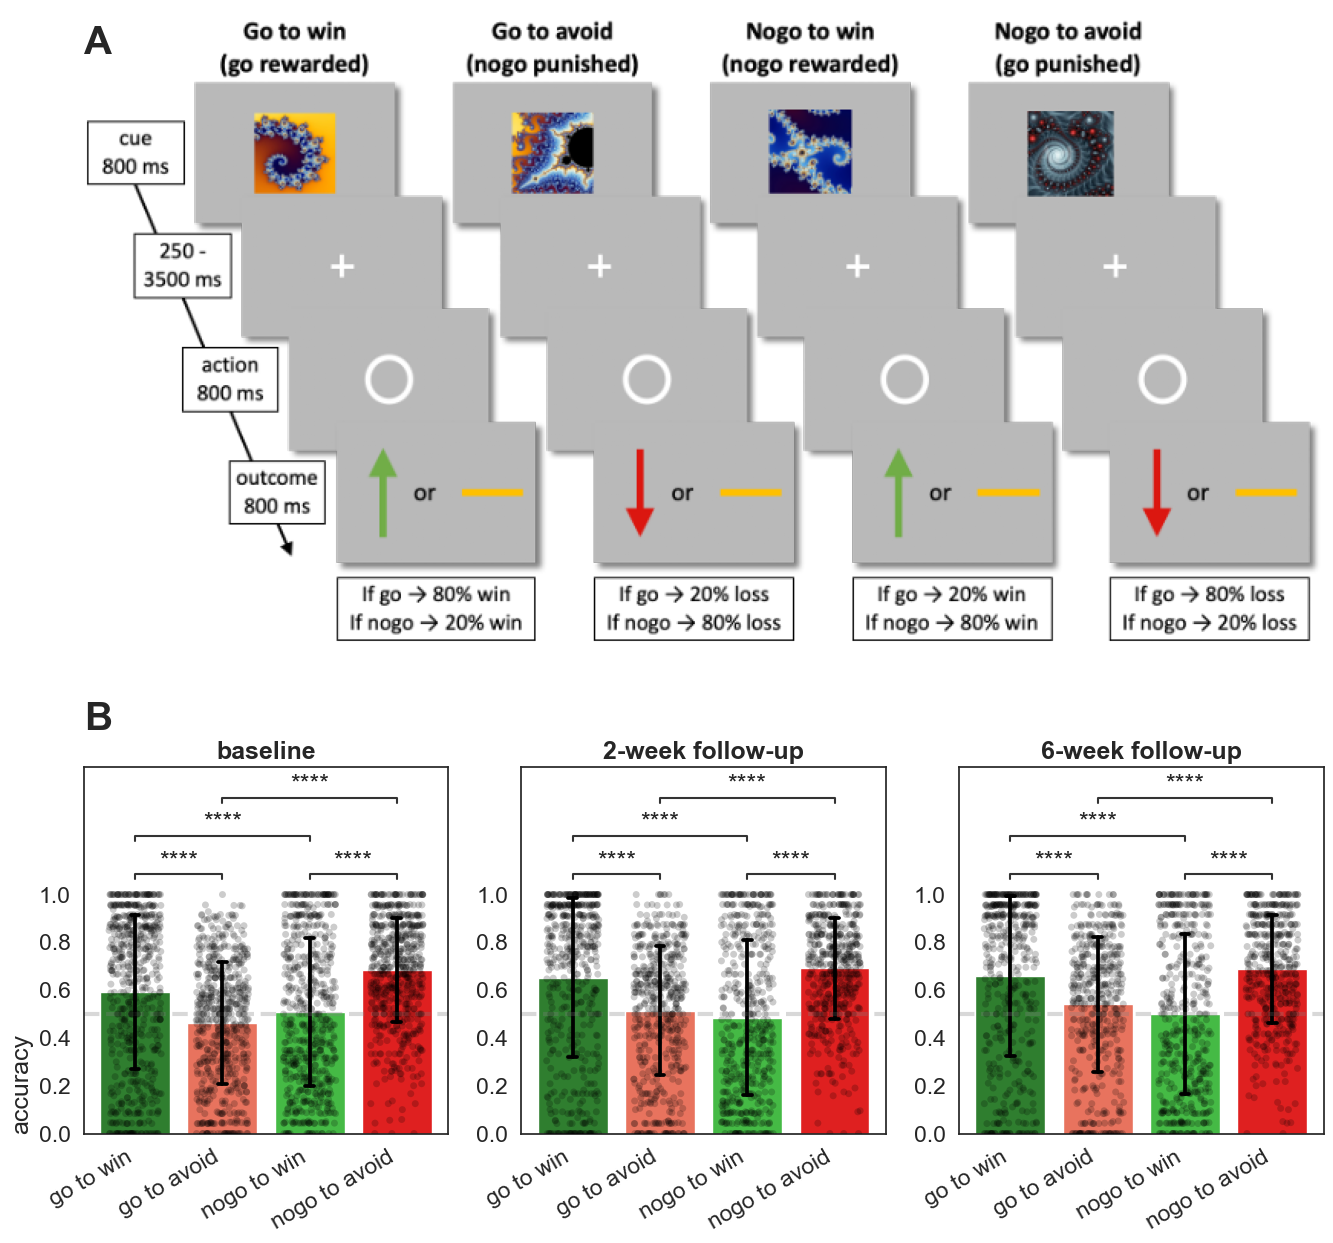

In [5]:
# Accuracy in the different conditions for each session
sns.set(style='white',font_scale=1.5)
clrs = ['forestgreen', 'tomato','limegreen','red']
title_label = ['baseline', '2-week follow-up', '6-week follow-up']
fig, ax = plt.subplots(2,3,figsize=(16, 20), gridspec_kw={'height_ratios': [7,1]})
x = plt.imread(figpath + 'task.png')
ax = plt.subplot(2,1,1)
ax.imshow(x)
ax.axis('off');
ax.text(0, 0.93, 'A', transform=ax.transAxes, weight='bold', size=28)
ax = [plt.subplot(2,3,i+4) for i in range(3)]
fig.subplots_adjust(hspace=-0.95) 
for i in range(1,4):
    sns.stripplot(data=np.nanmean(data['a_correct'][:,:,data['sess']==i],axis=0).T, \
                  color='black', jitter=0.3, alpha=.2, ax=ax[i-1]);
    b = sns.barplot(data=np.nanmean(data['a_correct'][:,:,data['sess']==i],axis=0).T, \
                    capsize=.1, errcolor='black',ci="sd", palette=clrs, ax=ax[i-1]);
    annotator = Annotator(ax[i-1], [(0,1), (0,2), (1,3), (2,3)], \
                          data=np.nanmean(data['a_correct'][:,:,data['sess']==i],axis=0).T)
    annotator.configure(test='Mann-Whitney',verbose=0, comparisons_correction="bonferroni").apply_and_annotate()
    if i == 1: 
        b.set_ylabel('accuracy', loc='bottom');
    else:
        b.set_ylabel('')
    b.set_xticklabels(['go to win', 'go to avoid', 'nogo to win', 'nogo to avoid'],rotation=30,ha='right');
    b.set_title(title_label[i-1],weight='bold');
    b.axhline(0.5,0,1,linewidth=3,color='gray',linestyle='--',alpha=0.3)
    y_ticks = b.get_yticks();
    b.set_yticklabels([f'{y:.1f}' if y <= 1 else '' for y in y_ticks]);
ax[0].text(0, 1.1, 'B', transform=ax[0].transAxes, weight='bold', size=28);
if save_figure:
    for i in ['svg', 'eps', 'png']:
        plt.savefig(figpath + 'fig1.' + i , format=i, transparent=True, bbox_inches='tight')

Paper Figure 2
--

In [6]:
# Plotting surrogate data from the better fitting model 
modelling = prepdata.load_modelfits()
surrogate_data_in = prepdata.load_surrogate_data('results/model_fits/', 'll2b2a2epxb')
surrogate_data_ex = prepdata.load_surrogate_data('results/model_fits/', 'llb')
data = prepdata.extract_surrogate_data(data, surrogate_data_in)
opt_plot["surr_to_plot"] =  np.full_like(data['a_go'], np.nan)
opt_plot["surr_to_plot"][:,:,~modelling['most_parsimonious']['excluding']] = \
                        data['surr'][:,:,~modelling['most_parsimonious']['excluding']]
data = prepdata.extract_surrogate_data(data, surrogate_data_ex)
opt_plot["surr_to_plot"][:,:,modelling['most_parsimonious']['excluding']] = \
                        data['surr'][:,:,modelling['most_parsimonious']['excluding']]
data['surr'] = opt_plot["surr_to_plot"]

In [7]:
# Model comparison
arr = ['llb', 'llbax', 'llbaxb', 'llbaepxb', 'llba2epxb']
ibic = []
for i in arr:
    tmp = prepdata.load_modelling_results('/results/model_fits/', [i])
    ibic.append(tmp['ibic'])
ibic.append(modelling['most_parsimonious']['ibic'])
arr.append('ll2b2a2epxb')

llb = prepdata.load_modelling_results('/results/model_fits/', ['llb'])
diff_iL = modelling['most_parsimonious']['iL'] - llb['iL']

/Users/jolandamalamud/phd/papers/git/panda_public/code/python/plotting.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/5z/t44r3krd25sftrcjrj8j__4m0000gn/T/ipykernel_54417/3373184553.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


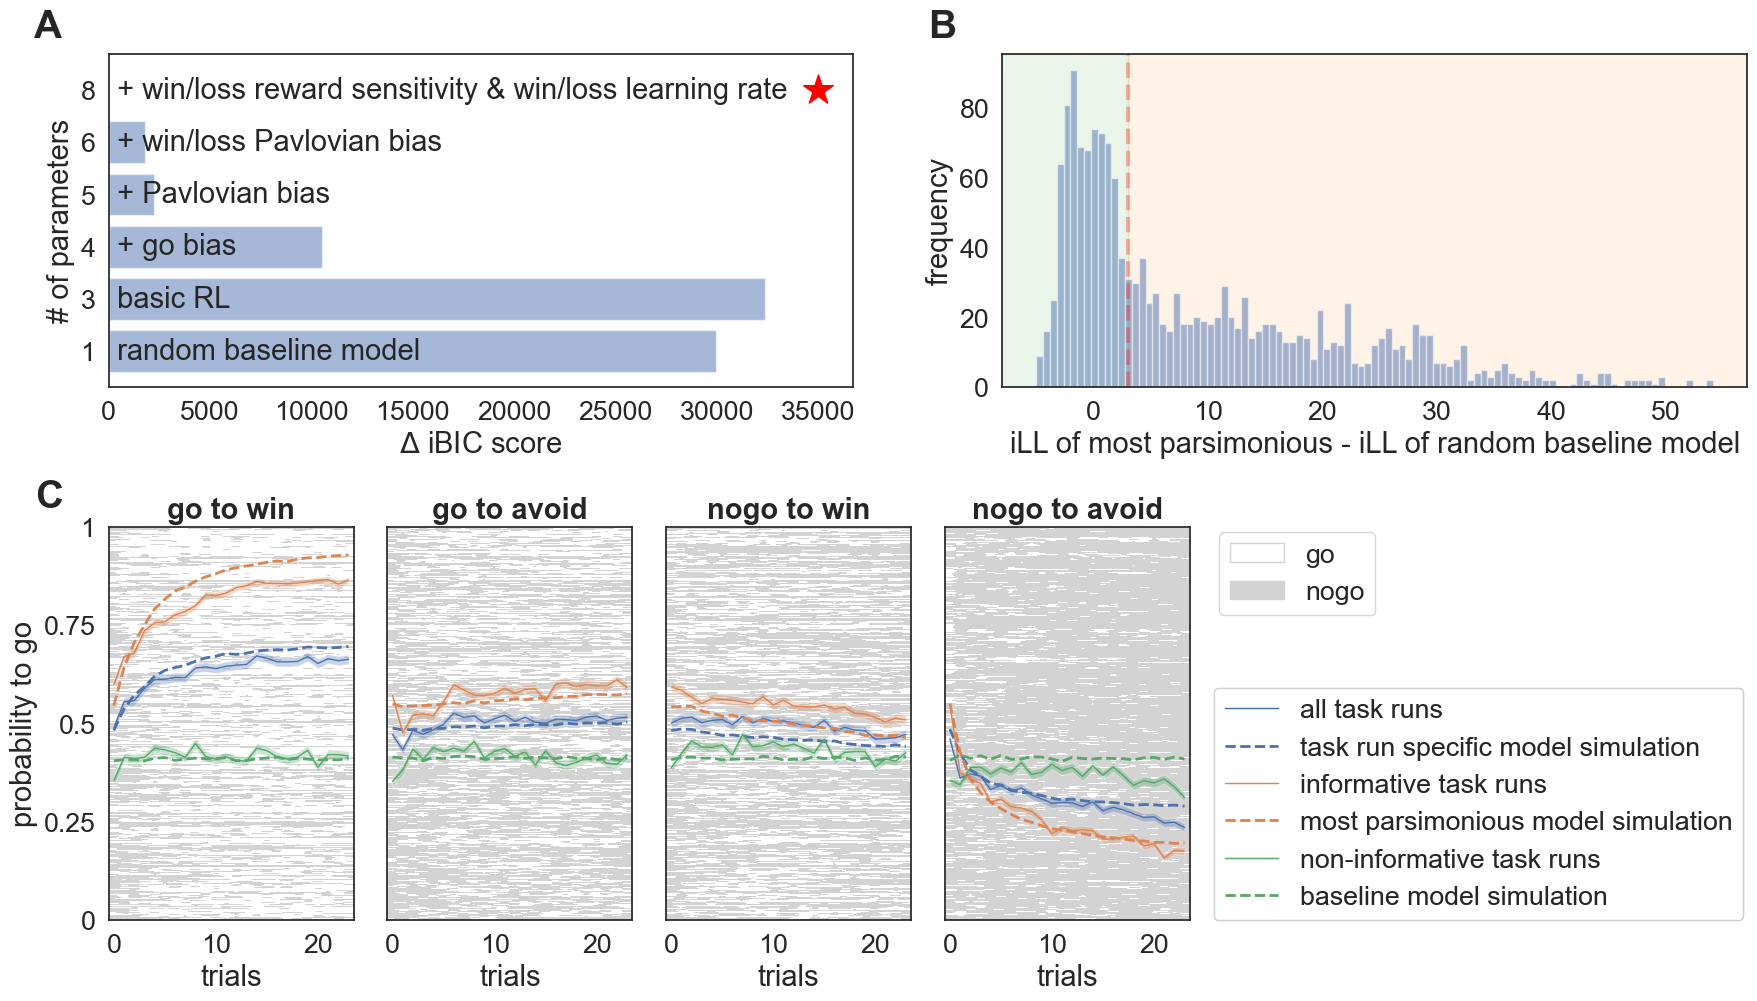

In [8]:
# Figure 1 Modelling
import matplotlib.gridspec as gridspec
sns.set(style='white', font_scale=1.75)
fig = plt.figure(figsize=(18, 10))
outer = gridspec.GridSpec(2, 1, hspace=0.6)
inner = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[0], wspace=0.2)
ax=[]
for i in range(2):
    axs = plt.Subplot(fig, inner[i])
    ax.append(fig.add_subplot(axs))
ax[0].barh(np.arange(len(ibic)), np.squeeze(np.array(ibic - min(ibic))), align='center', alpha=0.5)
ax[0].set_yticks(np.arange(len([1,3,4,5,6,8])))
ax[0].set_yticklabels([1,3,4,5,6,8])
ax[0].set_ylabel('# of parameters');
ax[0].set_xlabel('$\Delta$ iBIC score');
Disease = [' + win/loss reward sensitivity & win/loss learning rate',' + win/loss Pavlovian bias', \
           ' + Pavlovian bias',' + go bias',' basic RL',' random baseline model']
for bar, disease in zip(ax[0].patches, Disease[::-1]):
    ax[0].text(0.1, bar.get_y()+bar.get_height()/2, disease, ha = 'left', va = 'center') 
ax[0].scatter(35000, 5, marker = '*', s=500, color='red')
ax[0].text(-0.1, 1.05, 'A', transform=ax[0].transAxes, weight='bold', size=28)

bins = np.linspace(min(diff_iL), max(diff_iL), 100)
ax[1].hist(diff_iL, bins, alpha = 0.5, label='a', color='white');
xlim, ylim = ax[1].get_xlim(), ax[1].get_ylim()
ax[1].add_patch(plt.Rectangle((3, ylim[0]), xlim[1]-3, np.abs(ylim[0]) + ylim[1], \
                                             edgecolor=(1.0, 0.5, 0.05, 0.1), facecolor=(1.0, 0.5, 0.05, 0.1)))
ax[1].add_patch(plt.Rectangle((xlim[0], ylim[0]), np.abs(xlim[0])+3, np.abs(ylim[0]) + ylim[1], \
                                             edgecolor=(0.17, 0.63, 0.17, 0.1), facecolor=(0.17, 0.63, 0.17, 0.1)))
ax[1].hist(diff_iL, bins, alpha = 0.5, label='a');
ax[1].set(ylim=ylim, xlim=xlim)
ax[1].axvline(3,0,1,linewidth=3,color='red',linestyle='--',alpha=0.3)
ax[1].set_ylabel('frequency');
ax[1].set_xlabel('iLL of most parsimonious - iLL of random baseline model');
ax[1].text(-0.1, 1.05, 'B', transform=ax[1].transAxes, weight='bold', size=28)


opt_plot['yticklabels'] = [0,0.25,0.5,0.75,1]
opt_plot['plot_chance_line'] = False
opt_plot['Nsj'] = np.shape(data['a_go'])[2]

opt_plot['plot_individual_choices'] = True
opt_plot['legend'] = ['all task runs', 'task run specific model simulation']
opt_plot['legend_location'] = (1.1,0.25)

ax = [plt.subplot(2,6,i+7) for i in range(4)]
pp.over_trials_plot(fig, ax, data['a_go'], data['surr'], opt_plot)

opt_plot['plot_individual_choices'] = False
legend_label = [['informative task runs', 'most parsimonious model simulation'], \
                      ['non-informative task runs', 'baseline model simulation']]
opt_plot['legend_location'] = (1.1,0)
for t in range(2):
    opt_plot['legend'] = legend_label[t]
    pp.over_trials_plot(fig, ax, data['a_go'][:,:,modelling['most_parsimonious']['excluding']==t], \
                 data['surr'][:,:,modelling['most_parsimonious']['excluding']==t], opt_plot)
ax[0].text(-0.3, 1.05, 'C', transform=ax[0].transAxes, weight='bold', size=28)
l1 = plt.legend(loc=opt_plot['legend_location']);
plt.gca().add_artist(l1);
plt.tight_layout()
if save_figure:
    for i in ['svg', 'eps', 'png']:
        plt.savefig(figpath + 'fig2.' + i , format=i, transparent=True, bbox_inches='tight')      

In [9]:
# Model comparison only informative data
def calculate_ibic(iL, Np, Ntrials):
    ibic = - 2*np.sum(iL) \
            - 0.5 *(2*Np)*np.log(Ntrials)
    return ibic

arr = ['llb', 'llbax', 'llbaxb', 'llbaepxb', 'llba2epxb', 'll2b2a2epxb']
Np = [1,3,4,5,6,8]
Ntrials = 96
ibic_informative = []
for j,i in enumerate(arr):
    tmp = prepdata.load_modelling_results('/results/model_fits/', [i])
    ibic_informative.append(calculate_ibic(tmp['iL'][modelling['most_parsimonious']['excluding']==0], \
            Np[j], Ntrials))

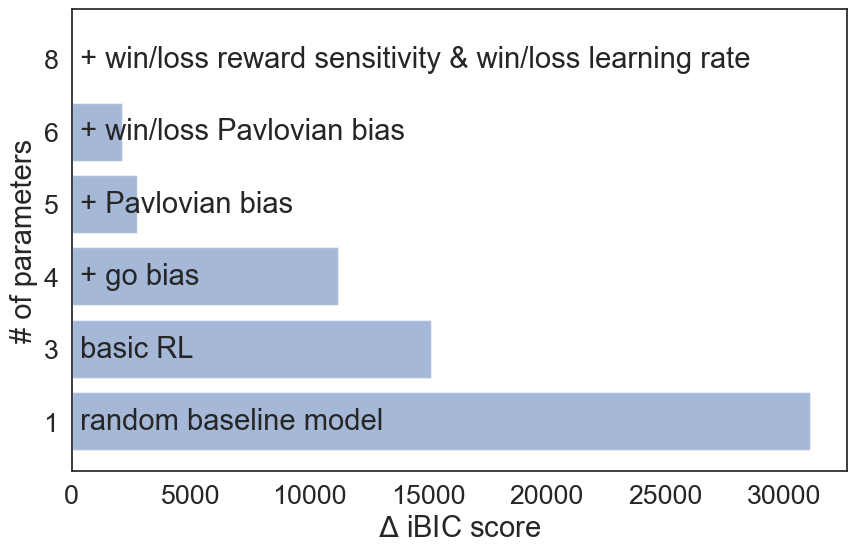

In [10]:
# model comparison for informative data
sns.set(style='white', font_scale=1.75)
fig,ax = plt.subplots(figsize=(10,6))
ax.barh(np.arange(len(ibic)), np.squeeze(np.array(ibic_informative - min(ibic_informative))), \
        align='center', alpha=0.5)
ax.set_yticks(np.arange(len([1,3,4,5,6,8])))
ax.set_yticklabels([1,3,4,5,6,8])
ax.set_ylabel('# of parameters');
ax.set_xlabel('$\Delta$ iBIC score');
Disease = [' + win/loss reward sensitivity & win/loss learning rate',' + win/loss Pavlovian bias', \
           ' + Pavlovian bias',' + go bias',' basic RL',' random baseline model']
for bar, disease in zip(ax.patches, Disease[::-1]):
    ax.text(0.1, bar.get_y()+bar.get_height()/2, disease, ha = 'left', va = 'center')
if save_figure:
    for i in ['svg', 'eps', 'png']:
        plt.savefig(figpath + 'fig_supp_modelselection_informative.' + i , format=i, \
                    transparent=True, bbox_inches='tight')

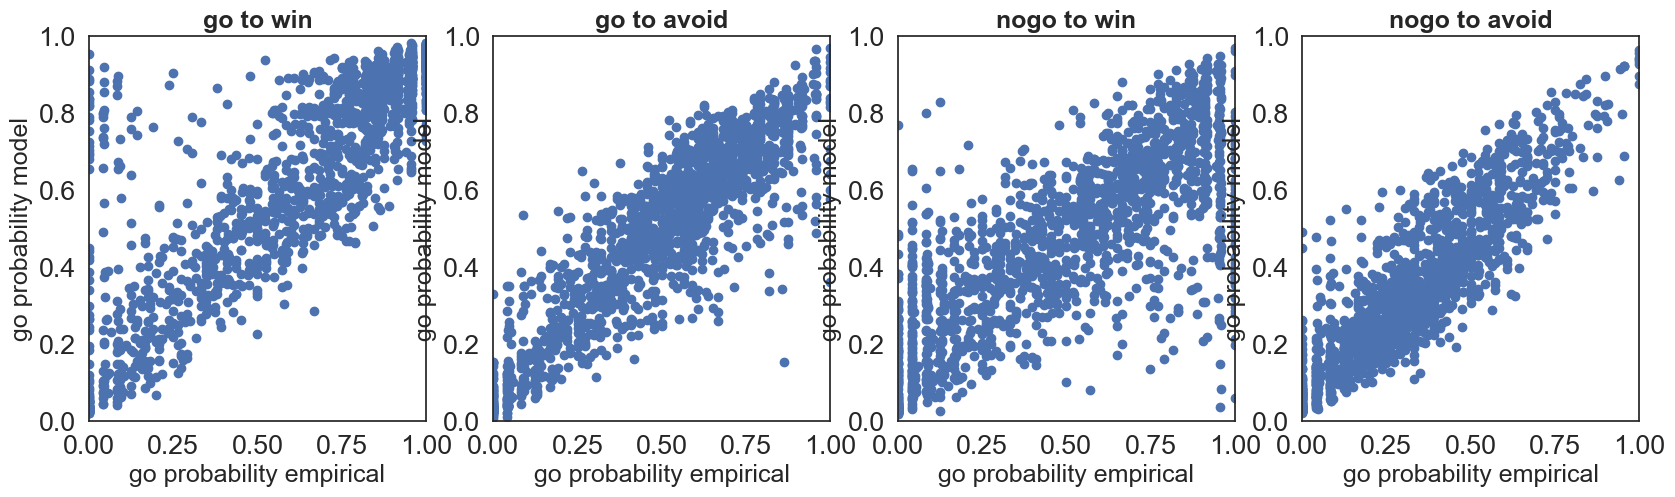

In [11]:
pp.goprobability_scatter_plot(data, opt_plot)
fig.tight_layout()

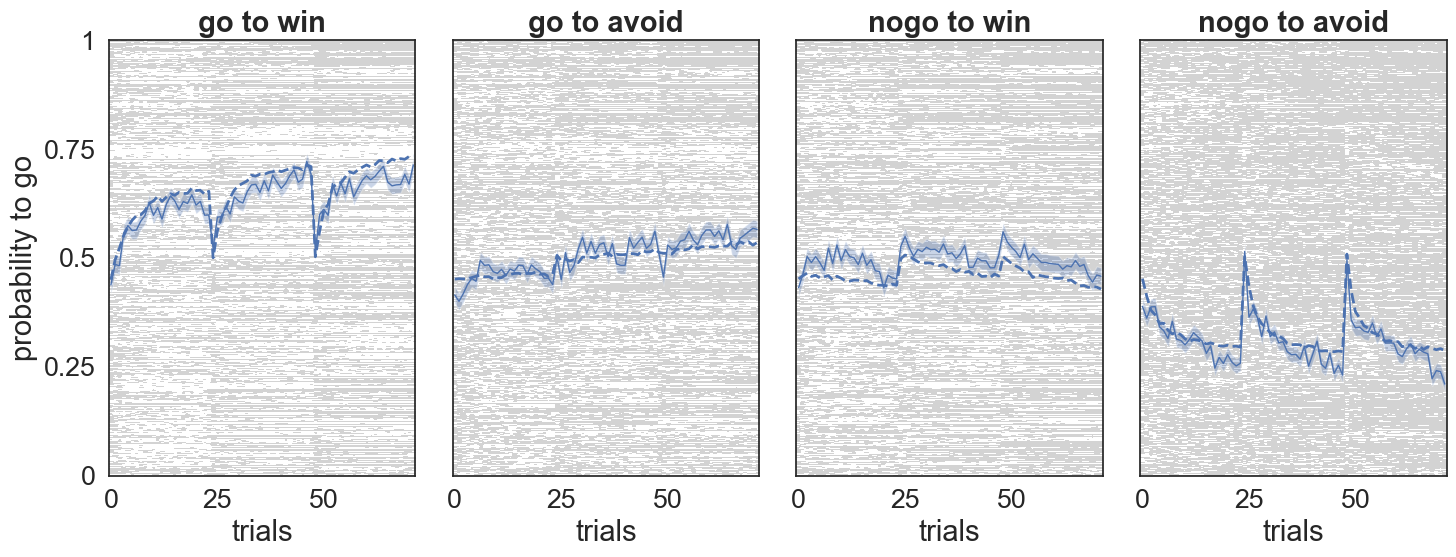

In [12]:
data_merged = data.copy()
data_merged = prepdata.merge_over_sessions(data_merged)
Nsj = np.shape(data_merged['a_go'])[2]

fig, ax = plt.subplots(1,4,figsize=(15, 6))
opt_plot['yticklabels'] = [0,0.25,0.5,0.75,1]
opt_plot['plot_chance_line'] = False

opt_plot['plot_individual_choices'] = True
opt_plot['legend'] = ['empirical data', 'generated data']
opt_plot['legend_location'] = (1.04,0.25)
opt_plot['Nsj'] = np.shape(data_merged['a_go'])[2]
pp.over_trials_plot(fig, ax, data_merged['a_go'], data_merged['surr'], opt_plot)

Paper Figure 3
--

In [13]:
# Load rct data
dfRCT = prepdata.load_rctdata()

# Define all variables of interest from RCT
baseline_vars = ['site', 'cis', 'dep', 'age', 'education', 'AD_past', \
               'sex', 'ethnic', 'fin', 'empstat', 'marstat', 'cisscore']

# Questionnaire variables which need to be log-transformed
log_transfer = [i + '0' for i in prepdata.psychiatric_questionnaire] + [i for i in dfRCT.columns if 'anh' in i]

# Create DataFrame
df_panda = prepdata.create_df(data, modelling, dfRCT, log_transfer)
df_panda = df_panda.astype(float)

In [14]:
# Compute change in parameter estimates
df_change_list = []
x = np.arange(3)
for i in prepdata.parameter_labels:
    # between baseline and week 2
    df_change_list.append(pd.DataFrame({i + '_slope01': df_panda[i + '1'] - df_panda[i + '0']}))
    # between week 2 and week 6
    df_change_list.append(pd.DataFrame({i + '_slope12': df_panda[i + '2'] - df_panda[i + '1']}))
    # Compute slope over time points for each subject
    slope_list=[]
    for sj in range(len(df_panda)):
        y = df_panda[[i + str(0), i + str(1), i + str(2)]].iloc[sj]
        idx = ~y.isna()
        if sum(idx) > 1:
            slope_list.append(np.polyfit(x[idx],y[idx],1)[0])
    
    slope_column = pd.DataFrame({i + '_slope': slope_list})
    df_change_list.append(slope_column)

# Concatenate all DataFrames in the list
df_panda = pd.concat([df_panda]+ df_change_list, axis=1)
df_panda = df_panda.astype(float)

In [15]:
def boxplot_over_time(fig, ax, data, opt):

    scat, vals, names, xs = [], [], [], []
    for i, col in enumerate(data.columns):
        vals.append(data[col].dropna().values)
        names.append(col)
        xs.append(np.random.normal(i + 1, 0.04, data[col].dropna().values.shape[0]))

    b = ax.boxplot(vals, showfliers = False)
    ax.set_xticks(opt['xticks'])
    ax.set_xticklabels(opt['xlabels'])
    palette = opt['colors']
    for x, val, c in zip(xs, vals, palette):
        scat.append(ax.scatter(x, val, alpha=0.4, color=c))
    ax.set_title(opt['title'], weight='bold');
    ax.set_ylabel(opt['ylabel']);
    for t in opt['vlines']:
        ax.axvline(t, 0, 1, linewidth=1, color='black', linestyle='--', alpha=0.1);
    return b, scat

In [16]:
def plot_significance(ax, x, text):
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] + max(ylim)/5)
    for i in range(len(text)):
        if '*' in text[i]:
            text_len = len(text[i])
        else:
            text_len = 2
        ax.text(x=x[i] - text_len * 0.05, y=max(ylim), s=text[i])
        ax.hlines(max(ylim), x[i] - 0.5, x[i] + 0.5, 'black')

In [17]:
def plot_parameter(parameter, parameter_label, fig, ax, pval):

    df = df_panda[parameter + '1'][df_panda['exclusion1']==0].copy()
    for t in range(1,3):
        for i in range(2):
            df = pd.concat((df, \
                            df_panda[parameter + str(t)][(df_panda['group']==i)&(df_panda['exclusion' + str(t)]==0)]), \
                           axis=1,ignore_index=True)

    opt_plot['legend'] = ['before randomization', 'placebo', 'sertraline', 'placebo', 'sertraline']
    opt_plot['xticks'] = [1, 2.5, 4.5]
    opt_plot['xlabels'] = ['baseline', 'week 2', 'week 6']
    opt_plot['colors'] = ['mediumorchid', 'royalblue','lightcoral','royalblue','lightcoral']
    opt_plot['title'] = parameter_label
    opt_plot['ylabel'] = 'untransformed point estimate'
    opt_plot['vlines'] = [1.5, 3.5]
    b, scat1 = boxplot_over_time(fig, ax[0], df, opt_plot)
    plot_significance(ax[0], [2.5, 4.5], pval[:2])
#     annotator = Annotator(ax[0], [(2,3)], data=df)
#     annotator.configure(verbose=0).set_pvalues_and_annotate(pval)

    df = pd.DataFrame()
    for i in range(2):
        df = pd.concat((df, df_panda[parameter + '_slope01'][(df_panda['group']==i)&(df_panda['exclusion0']==0)&(df_panda['exclusion1']==0)]), axis=1,ignore_index=True)
    for i in range(2):
        df = pd.concat((df, df_panda[parameter + '_slope12'][(df_panda['group']==i)&(df_panda['exclusion1']==0)&(df_panda['exclusion2']==0)]), axis=1,ignore_index=True)

    del opt_plot['legend']
    opt_plot['xticks'] = [1.5, 3.5]
    opt_plot['xlabels'] = ['week 2 - baseline', 'week 6 - week 2']
    opt_plot['title'] = 'change in ' + parameter_label
    opt_plot['ylabel'] = 'change in parameter estimate'
    opt_plot['colors'] = ['royalblue','lightcoral','royalblue','lightcoral']
    opt_plot['vlines'] = [2.5]
    b, scat = boxplot_over_time(fig, ax[1], df, opt_plot)
    plot_significance(ax[1], [1.5, 3.5], pval[2:])
#     annotator = Annotator(ax[1], [(1,2)], data=df)
#     annotator.configure(verbose=0).set_pvalues_and_annotate(pval)
    return b, scat1

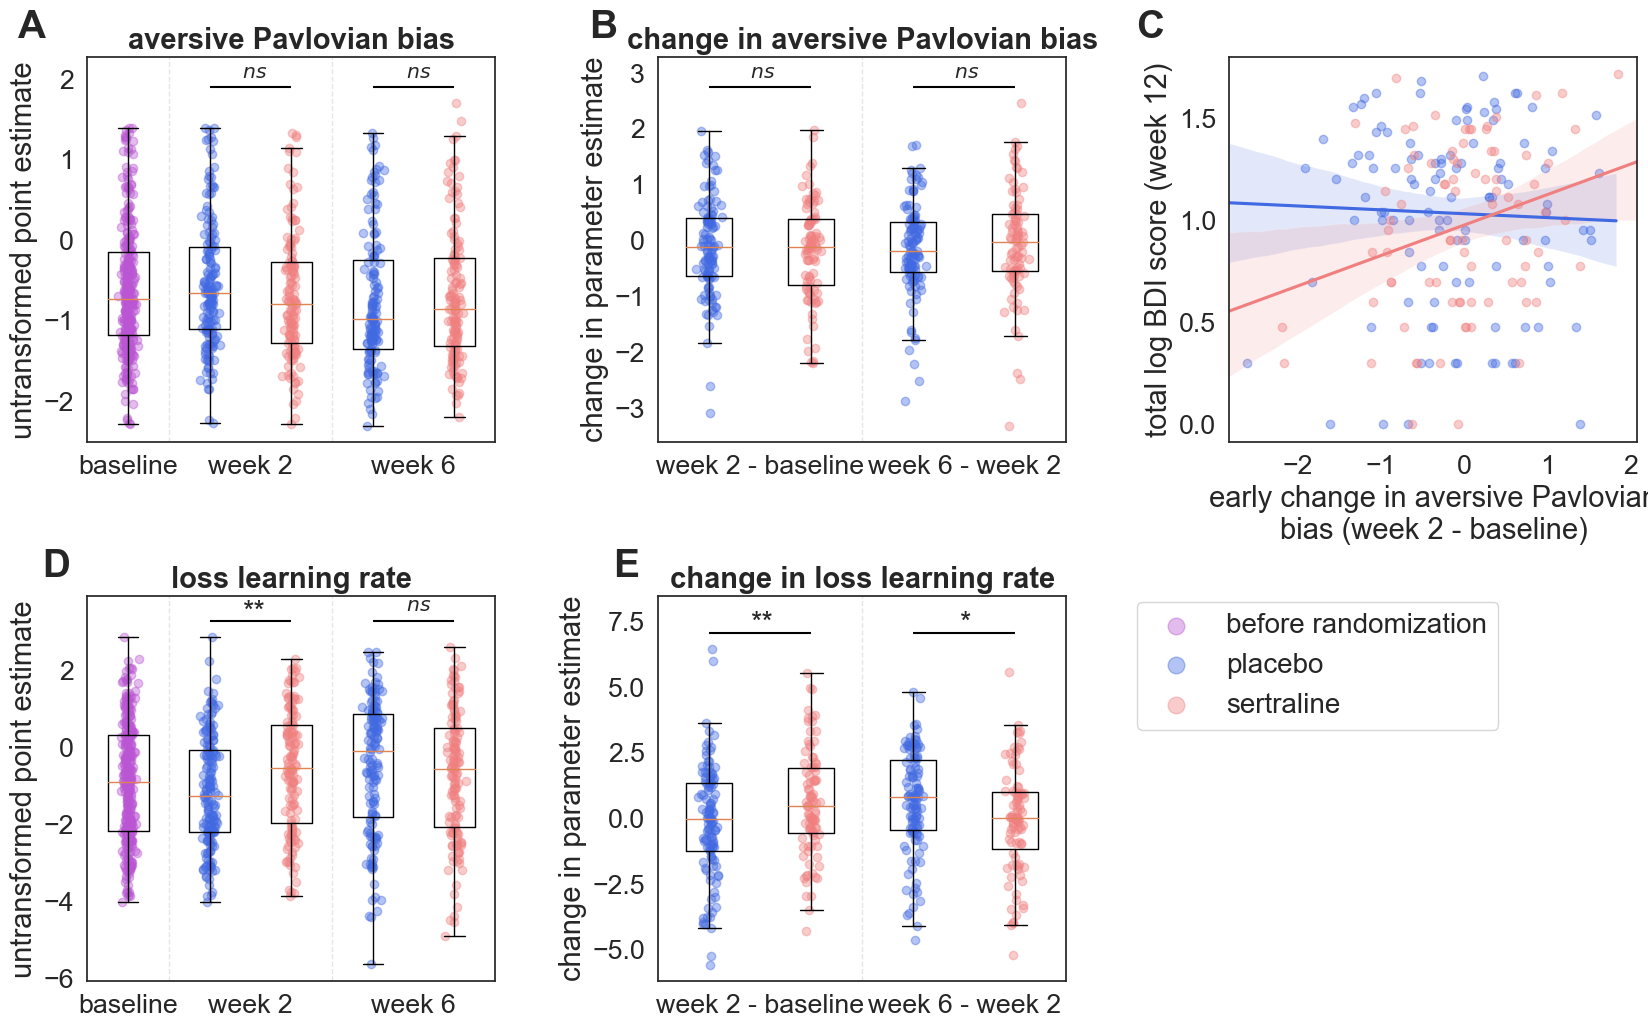

In [18]:
# Figure 3 results
fig, ax = plt.subplots(2,3,figsize=(20, 12), clear=True)
opt_plot['colors'] = ['royalblue','lightcoral','royalblue','lightcoral']

for i in range(2):
    sns.regplot(x="av_Pav_slope01", y="bdi3log", \
                data=df_panda[(df_panda['exclusion1']==0)&(df_panda['exclusion2']==0)&(df_panda['group'] == i)].astype('float'), \
                ax=ax[0,2], color=opt_plot['colors'][i], truncate=False, scatter_kws={'alpha':0.4})
ax[0,2].set_ylabel('total log BDI score (week 12)');
ax[0,2].set_xlabel('early change in aversive Pavlovian\nbias (week 2 - baseline)');
ax[0,2].text(-0.23, 1.05, 'C', transform=ax[0,2].transAxes, weight='bold', size=28)


parameter = ['av_Pav', 'loss_LR']
parameter_label = ['aversive Pavlovian bias', 'loss learning rate']
specific_sig = [['$^{ns}$','$^{ns}$','$^{ns}$','$^{ns}$'],['**', '$^{ns}$', '**', '*']]
for j,p in enumerate(parameter):
    subax = [plt.subplot(2,3,i+1+j*3) for i in range(2)]
    b, scat = plot_parameter(p, parameter_label[j], fig, subax, specific_sig[j])
    if j == 0: scat1 = scat.copy();
    for k in range(2):
        subax[k].text(-0.17 + j*0.06, 1.05, [['A','B'],['D','E']][j][k], transform=subax[k].transAxes, weight='bold', size=28)

ax = plt.subplot(2,3,6)
ax.axis('off')
fig.subplots_adjust(wspace=0.4,hspace=0.4)
fig.legend(scat1, ['before randomization', 'placebo', 'sertraline'], loc=(0.69,0.29), fontsize=20, markerscale=2)
if save_figure:
    for i in ['svg', 'eps', 'png']:
        plt.savefig(figpath + 'fig3.' + i , format=i, transparent=True, bbox_inches='tight')

In [19]:
def test_normality(data):
    dim = np.shape(data)
    normality_assumption = []
    if len(dim) > 2:
        for i in range(dim[0]):
            for j in range(dim[1]):
                normality_test = scipy.stats.shapiro(data[i,j,:])
                normality_assumption.append(normality_test[1] > 0.05)
    elif len(dim) == 2:
        for i in range(dim[0]):
            normality_test = scipy.stats.shapiro(data[i,:])
            normality_assumption.append(normality_test[1] > 0.05)
    elif len(dim) == 1:
        normality_test = scipy.stats.shapiro(data)
        normality_assumption.append(normality_test[1] > 0.05)

    return normality_assumption

[False, False, False, False, False, False, False, False]


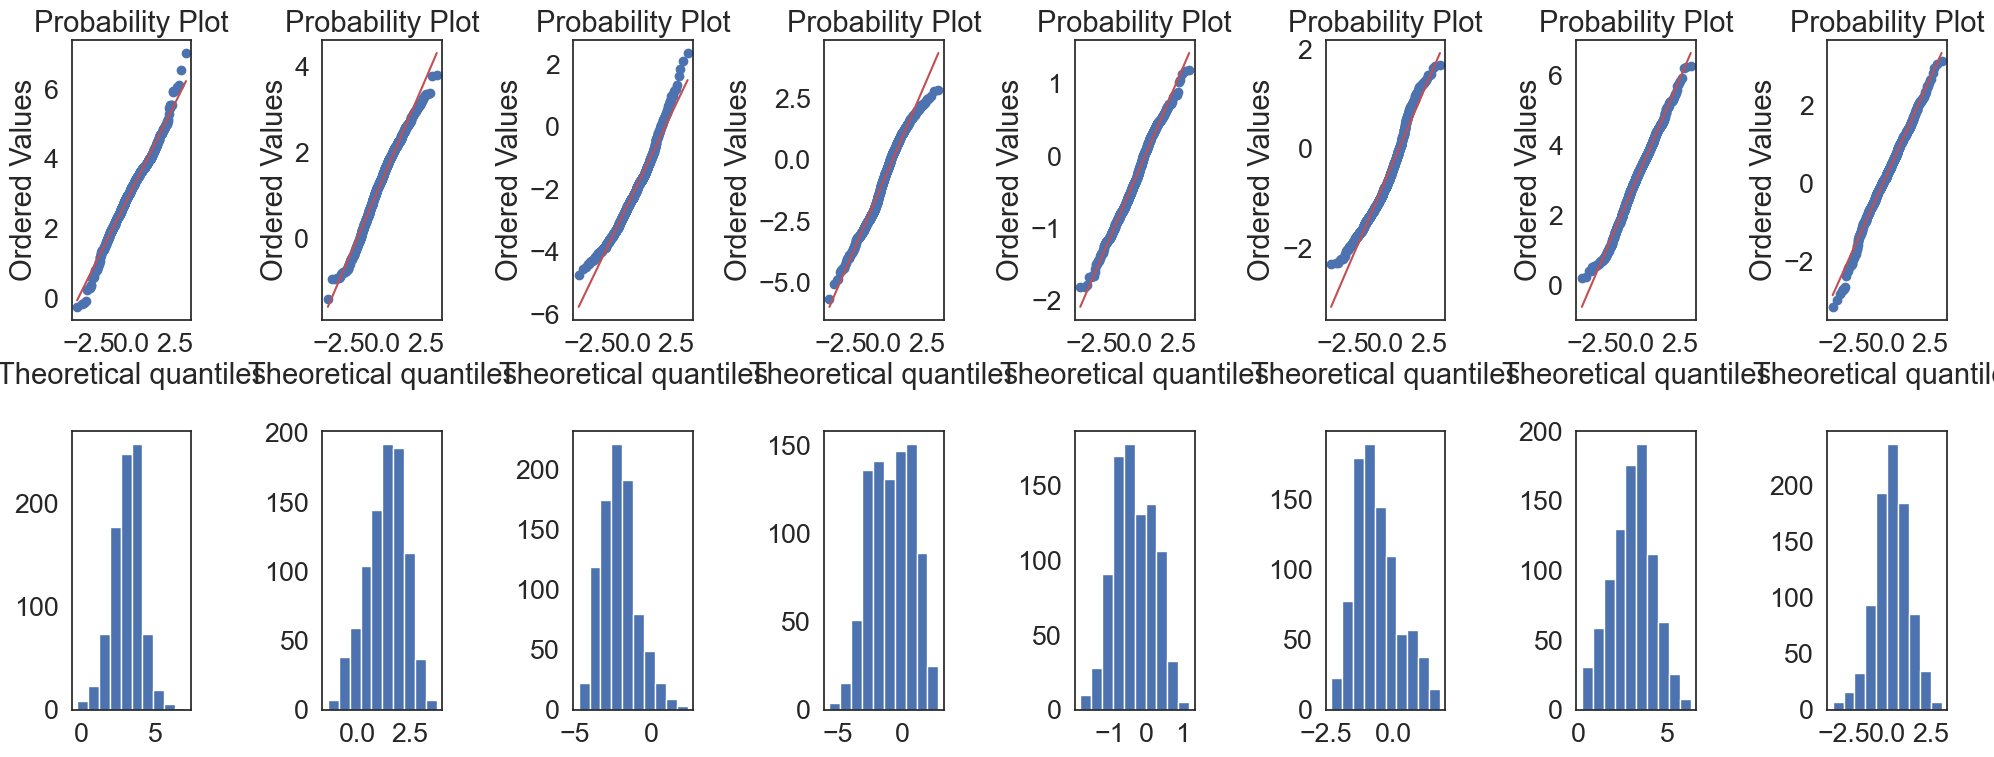

In [20]:
# Test normality of parameter estimates
print(test_normality(modelling['most_parsimonious']['emmap']))
fig,axs = plt.subplots(2,8,figsize=(20,8))
for j in range(8):
    scipy.stats.probplot(modelling['most_parsimonious']['emmap'][j,modelling['most_parsimonious']['excluding']==0], plot=axs[0,j])
    axs[1,j].hist(modelling['most_parsimonious']['emmap'][j,modelling['most_parsimonious']['excluding']==0])
plt.tight_layout()

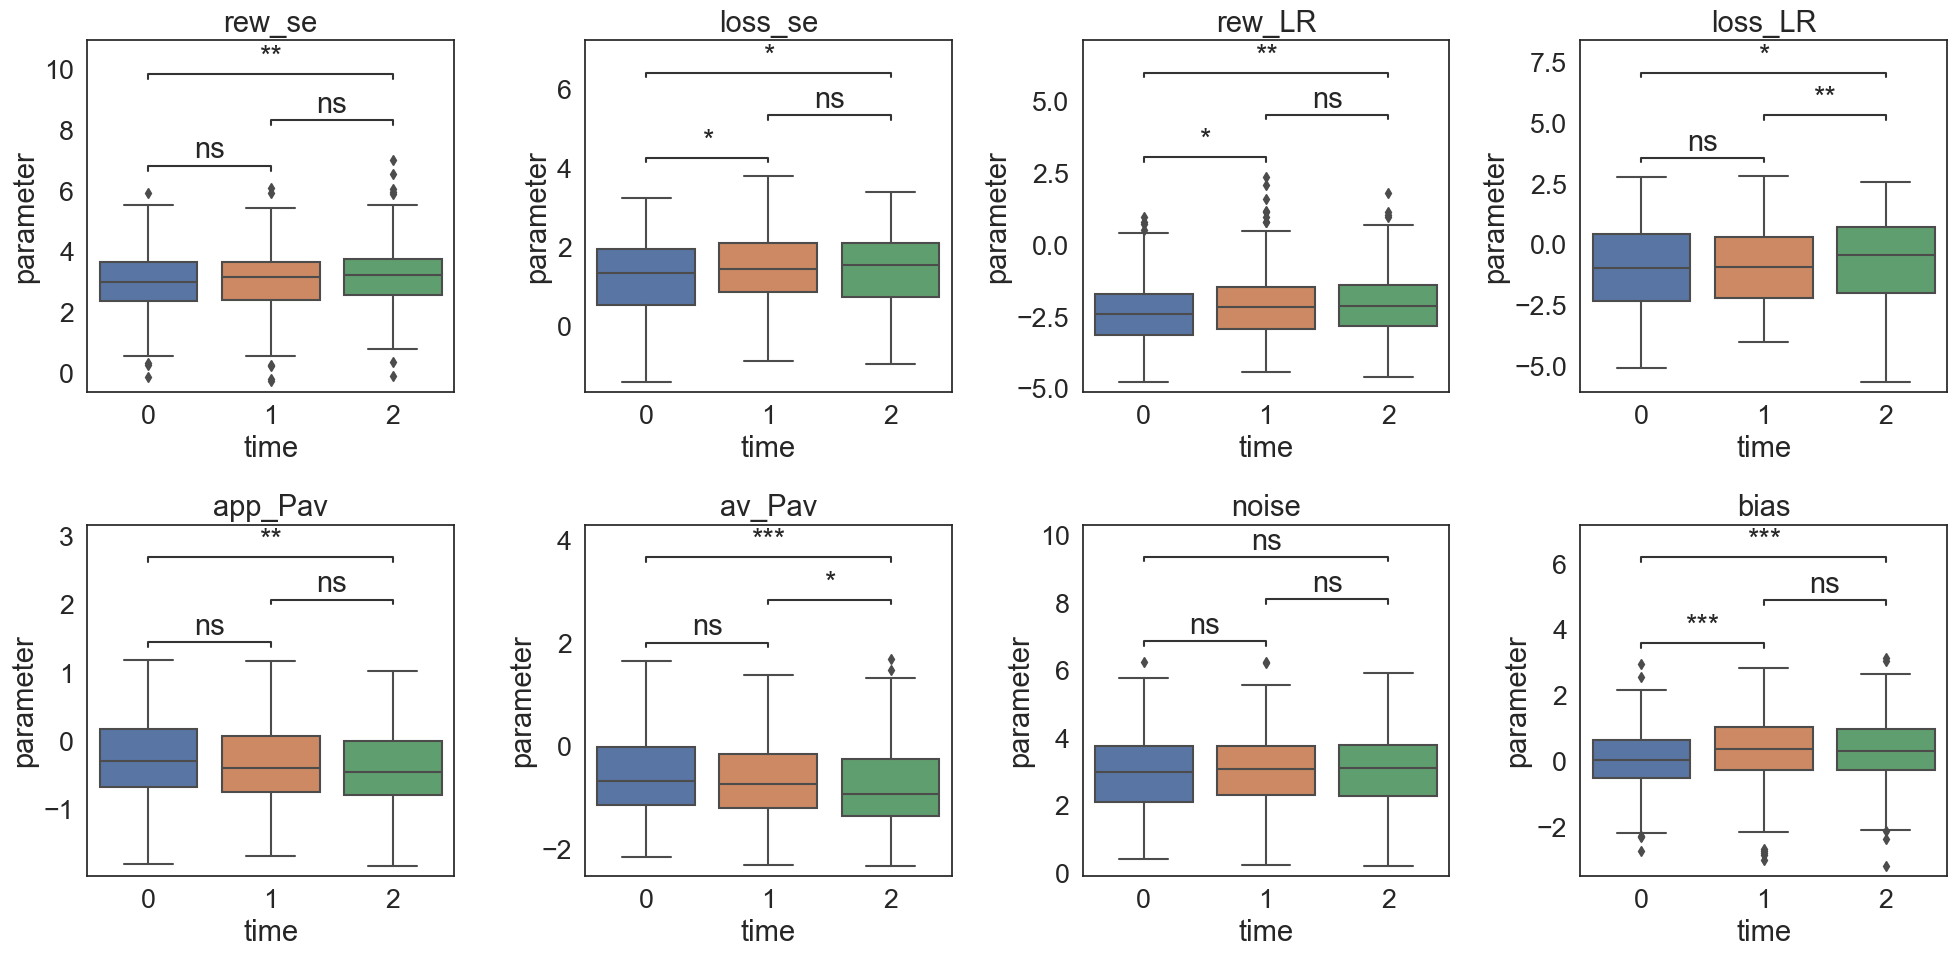

In [21]:
# Plot parameter estimates over time
def plot_parameter_over_time(df, ax):
    from itertools import combinations
    pairs = list(combinations(df['time'].unique(), r=2))
    p = sns.boxplot(x='time', y='parameter', data=df, ax = ax)
    annotator = Annotator(ax, pairs, x='time', y='parameter', data=df, verbose=False)
    annotator.configure(test="Mann-Whitney");
    annotator.apply_and_annotate();

# Create the boxplot
mle_df = prepdata.create_mle_df(df_panda, prepdata.gng_variables + prepdata.parameter_labels, baseline_vars)
fig,axs = plt.subplots(2,4,figsize=(20,10))
j = 0; i = 0
for p in prepdata.parameter_labels[:-1]:
    cc = [p + str(k) for k in [0,2,5]]
    reshaped_df = mle_df[[p,'time']][mle_df['exclusion']==0].copy()
    reshaped_df = reshaped_df.rename(columns={p: 'parameter'})
    # Rename the columns
    plot_parameter_over_time(reshaped_df,axs[j,i])
    axs[j,i].set_title(p)
    if i == 3: 
        j = 1
        i = 0
    else:
        i += 1
plt.tight_layout()

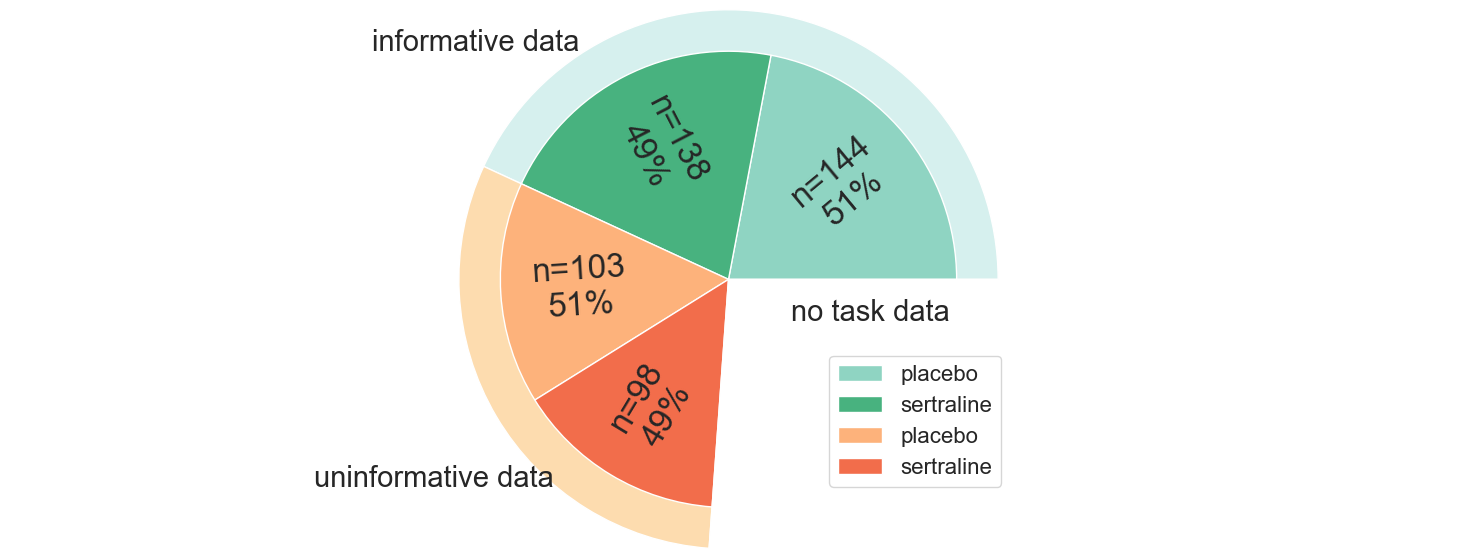

In [22]:
# Plot a cake diagram of informative vs non-informative data
group_names=['informative data', 'uninformative data','no task data']
group_size=[np.mean(df_panda['exclusion2']==0), np.mean(df_panda['exclusion2']==1), np.mean(df_panda['exclusion2'].isna())]
subgroup_names=[]
pie_data = []
for j in range(2):
    for i in range(2):
        tmp = df_panda['exclusion2'][df_panda['group']==i]
        pie_data.append(np.nansum(tmp==j)/len(df_panda['group']))
        subgroup_names.append('n=' + str(np.nansum(tmp==j)) + '\n' + \
                              str(int(np.round(np.nansum(tmp==j)/np.sum(df_panda['exclusion2']==j)*100))) + '%')
pie_data.append(group_size[-1])
subgroup_size=pie_data
subgroup_names.append('')

# Create colors
a, b=[plt.cm.BuGn,plt.cm.OrRd]

# First Ring (outside)
fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, colors=[a(0.2), b(0.2), 'white'],normalize=False )
label_position = [[-1.72,1.1],[-2,-1],[0.3,-0.2]]
for i in range(3):
    ax.annotate(group_names[i], xy=label_position[i])

plt.setp(mypie,edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.2,  labels=subgroup_names, labeldistance=0.65, \
                   colors=[a(0.4), a(0.6), b(0.4), b(0.6), 'white'], rotatelabels=True, \
                   textprops = dict(fontsize = 24, rotation_mode = 'anchor', va='center', ha='center'))
plt.setp(mypie2, edgecolor='white')
plt.margins(0,0)
subgroup_names_legs=['placebo', 'sertraline', 'placebo', 'sertraline']
plt.legend(mypie2, subgroup_names_legs,fontsize=16,loc=(0.57,0.1))
fig.tight_layout()